In [2]:
 #Importing necessary libraries
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import io
import requests
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [3]:
df=pd.read_csv("BTCUSD.csv")

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 366 entries, 0 to 365
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Date             366 non-null    object 
 1   Open             363 non-null    float64
 2   High             363 non-null    float64
 3   Low              363 non-null    float64
 4   Close            363 non-null    float64
 5   Adj Close        363 non-null    float64
 6   Volume           363 non-null    float64
 7   Tweet_sentiment  366 non-null    float64
dtypes: float64(7), object(1)
memory usage: 21.5+ KB


In [5]:
import datetime as dt
df['Date'] = pd.to_datetime(df['Date'])
df['Date'] = df['Date'].map(dt.datetime.toordinal)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 366 entries, 0 to 365
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Date             366 non-null    int64  
 1   Open             363 non-null    float64
 2   High             363 non-null    float64
 3   Low              363 non-null    float64
 4   Close            363 non-null    float64
 5   Adj Close        363 non-null    float64
 6   Volume           363 non-null    float64
 7   Tweet_sentiment  366 non-null    float64
dtypes: float64(7), int64(1)
memory usage: 22.9 KB


In [7]:
df.isnull().sum()


Date               0
Open               3
High               3
Low                3
Close              3
Adj Close          3
Volume             3
Tweet_sentiment    0
dtype: int64

In [8]:
df. dropna(subset = ["Open","High","Low","Close","Adj Close", "Volume"], inplace=True)

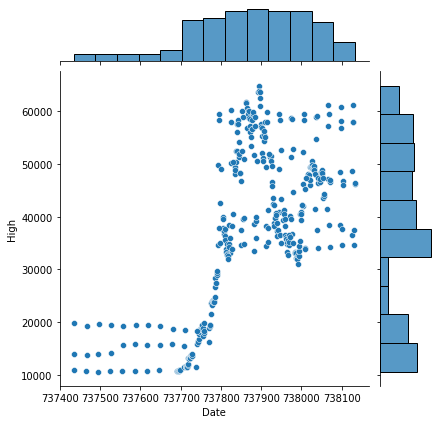

In [11]:
sns.jointplot(x='Date',y = 'High', data=df)

In [66]:
df.corr()

,Date,Open,High,Low,Close,Adj Close,Volume,Tweet_sentiment
Date,1.000000,0.661163,0.663798,0.656061,0.660551,0.660551,0.161339,-0.028392
Open,0.661163,1.000000,0.997530,0.994918,0.993688,0.993688,0.398597,-0.062145
High,0.663798,0.997530,1.000000,0.994783,0.997226,0.997226,0.411262,-0.062641
Low,0.656061,0.994918,0.994783,1.000000,0.996774,0.996774,0.362459,-0.066321
Close,0.660551,0.993688,0.997226,0.996774,1.000000,1.000000,0.389348,-0.066632
Adj Close,0.660551,0.993688,0.997226,0.996774,1.000000,1.000000,0.389348,-0.066632
Volume,0.161339,0.398597,0.411262,0.362459,0.389348,0.389348,1.000000,-0.060319
Tweet_sentiment,-0.028392,-0.062145,-0.062641,-0.066321,-0.066632,-0.066632,-0.060319,1.000000


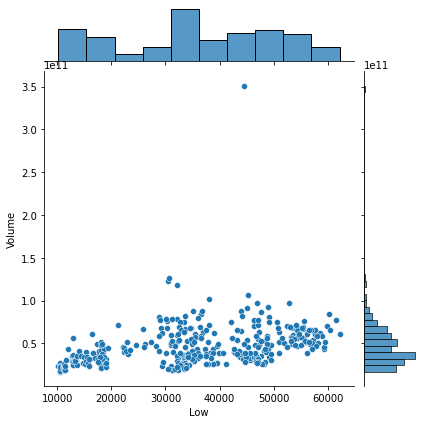

In [67]:
sns.jointplot(x='Low',y ='Volume', data=df)

Splitting the variable for model building

In [104]:
X = df.drop(columns=['High'])
Y = df['High']

In [147]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, train_size=.7, random_state=0)

In [148]:
X_train

,Date,Open,Low,Close,Adj Close,Volume,Tweet_sentiment
106,737972,36833.87500,36491.19141,39371.04297,39371.04297,8.476214e+10,-0.500000
201,738128,60175.94531,59589.87500,59893.45313,59893.45313,5.182869e+10,1.000000
199,738067,58253.77734,58038.70703,59793.23438,59793.23438,5.823847e+10,1.000000
285,737917,35284.34375,33213.66016,33746.00391,33746.00391,2.672155e+10,1.000000
365,738056,43551.96094,43182.21875,43726.50000,43726.50000,3.735559e+10,0.000000
334,738025,49291.67578,49074.60547,49546.14844,49546.14844,3.430505e+10,0.500000
301,737992,29796.28516,29526.18359,32110.69336,32110.69336,2.820302e+10,0.000000
220,737795,57714.66406,57052.27344,57828.05078,57828.05078,4.283643e+10,0.000000
226,737976,56413.95313,55321.84766,57356.40234,57356.40234,6.843402e+10,0.000000
84,737775,19418.81836,19298.31641,21310.59766,21310.59766,4.440901e+10,1.000000


In [149]:
Y_train

106    40180.36719
201    61253.03516
199    61276.66406
285    35284.34375
365    44316.50000
334    50482.07813
301    32752.32617
220    58448.33984
226    58606.63281
84     21458.90820
1      10765.79492
139    48003.72266
8      10915.84375
267    39513.67188
248    37234.50000
156    48370.78516
284    35937.56641
135    38225.90625
296    32218.40625
273    34753.41016
256    36436.42188
36     13612.04785
345    50982.27344
37     13651.51660
173    60540.99219
100    29600.62695
88     24209.66016
216    55416.96484
158    46716.42969
358    48486.82813
323    46228.91016
178    60031.28516
111    36568.52734
49     15916.26074
292    34592.15625
182    57262.38281
76     19283.47852
140    47145.56641
348    52700.94141
343    49111.08984
170    57996.62109
32     13329.18359
262    37408.92578
249    36400.66797
299    31885.85938
321    46637.98828
30     13015.96191
232    51330.84375
242    38289.21875
159    49784.01563
283    34909.26172
141    48463.46875
261    37608

In [150]:
df['Volume'].mean()

46960450353.873276

In [151]:
from sklearn.linear_model import LinearRegression

In [152]:
model = LinearRegression()


In [153]:
model.fit(X_train, Y_train)

LinearRegression()

In [154]:
Y_pred = model.predict(X_test)      

In [155]:
Y_pred

array([42622.26079584, 39472.42210252, 15633.48663976, 13171.03664505,
       58419.56326393, 52050.93404983, 24234.2718365 , 35495.18952218,
       37204.99406166, 11054.24254462, 34648.99611039, 54505.6392012 ,
       58142.46153042, 19480.99317106, 46324.73348122, 55534.76740606,
       41264.98259824, 34231.56691309, 34517.69055353, 33734.14989773,
       48600.84786279, 27239.41294138, 37429.80993157, 35636.80567905,
       40412.79456974, 37287.09899736, 19718.45646415, 39972.79486875,
       46626.06633406, 32161.87598545, 55618.91416905, 40671.92275186,
       11095.96715805, 14013.75634885, 18377.36347751, 11013.29443129,
       19456.42465427, 33578.7230406 , 33118.15182296, 31044.06162034,
       49202.2235712 , 46655.72668868, 52047.16573472, 38733.86744   ,
       11753.61764718, 18796.16493846, 24966.38504314, 53160.23799596,
       38842.93509224, 18342.72694152, 63321.62047719, 34731.26018445,
       18666.84779162, 51256.71550111, 18989.43341962, 17778.73240919,
      

In [156]:
model.coef_

array([ 3.46693090e-01,  6.34171950e-01, -2.51591002e-01,  3.14860413e-01,
        3.14860413e-01,  6.66890521e-09,  6.40976704e+01])

In [157]:
model.intercept_

-255842.72565027652

In [170]:
from sklearn import metrics
mse = metrics.mean_squared_error(Y_test, Y_pred)

c:\users\acer\appdata\local\programs\python\python38-32\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='High', ylabel='Density'>

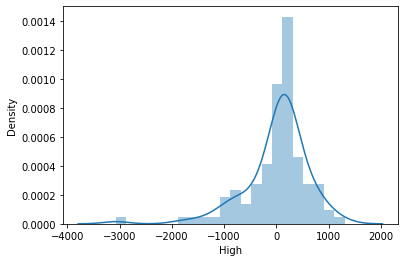

In [160]:
sns.distplot(Y_pred-Y_test)

In [161]:
regressor = LinearRegression()
regressor.fit(X_train,Y_train)
r2_score = regressor.score(X_test,Y_test)
print(r2_score*100,'%')

99.8387833993869 %


## sns.scatterplot(x=Y_pred, y=Y_pred-Y_test)

c:\users\acer\appdata\local\programs\python\python38-32\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
c:\users\acer\appdata\local\programs\python\python38-32\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'Actual(Red) vs Predicted (Green)')

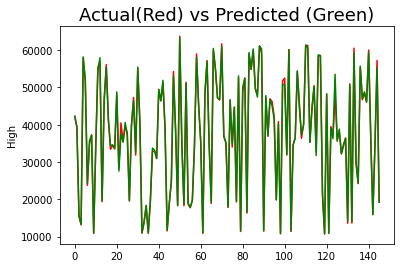

In [145]:
sns.lineplot(list_values, Y_test, color='Red')
sns.lineplot(list_values, Y_pred, color='Green')
plt.title('Actual(Red) vs Predicted (Green)', fontsize = 18)


In [122]:
import statsmodels.api as sm
X_train_sm = sm.add_constant(X_train)


In [123]:
stats_model = sm.OLS(Y_train,X_train_sm.astype(float)).fit()

In [124]:
stats_model.params

const             -2.558427e+05
Date               3.466931e-01
Open               6.341720e-01
Low               -2.515910e-01
Close              3.149368e-01
Adj Close          3.147841e-01
Volume             6.668905e-09
Tweet_sentiment    6.409767e+01
dtype: float64

In [125]:
stats_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   High   R-squared:                       0.999
Model:                            OLS   Adj. R-squared:                  0.999
Method:                 Least Squares   F-statistic:                 2.828e+04
Date:                Wed, 29 Sep 2021   Prob (F-statistic):               0.00
Time:                        14:28:19   Log-Likelihood:                -1980.4
No. Observations:                 254   AIC:                             3975.
Df Residuals:                     247   BIC:                             4000.
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const           -2.558e+05   2.58e+05     -0.992      0.322   -7.64e+05    2.52e+05
Date                0.3467      0.350      0.991      0.322      -0.342       1.035
Open                0.6342      0.028     22.571      0.000       0.579       0.690
Low                -0.2516      0.042     -6.022      0.000      -0.334      -0.169
Close               0.3149      0.018     17.642      0.000       0.280       0.350
Adj Close           0.3148      0.018     17.613      0.000       0.280       0.350
Volume           6.669e-09   1.66e-09      4.009      0.000    3.39e-09    9.95e-09
Tweet_sentiment    64.0977     59.272      1.081      0.281     -52.646     180.841
==============================================================================
Omnibus:                       68.243   Durbin-Watson:                   2.063
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              228.530
Skew:                           1.111   Prob(JB):                     2.37e-50
Kurtosis:                       7.081   Cond. No.                     2.82e+23
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 9.41e-24. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""